# einops的基本使用
einops用于实现对张量（Tensor）的操作，它可以更简单的实现张量的变换，并且很容易上手。einops的作用类似pytorch中的review，transpose，permute等操作的合集。

## 安装

```python
pip install einops

```


(643, 991, 3)


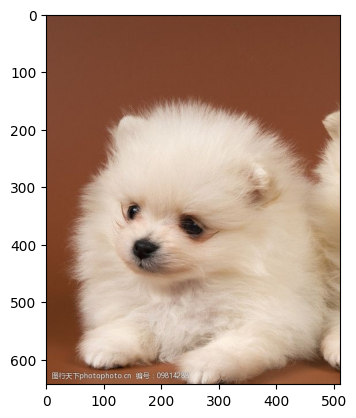

In [16]:
## 加载图片
import cv2
import matplotlib.pyplot as plt
from einops import rearrange,repeat,reduce

path = './images/dog.jpg'
image = cv2.imread(path)
print(image.shape)
# cv2imread()这个函数，一定要注意读取的顺序是BGR，skimage.io.imread()读取的是RGB
b, g, r = cv2.split(image)
image = cv2.merge([r, g, b])
image = image[:, :512, :]
plt.imshow(image)

## rearrange操作
```python
# 函数定义如下：
def rearrange(tensor, pattern: str, **axes_lengths):
    ...

image = rearrange(image, 'h w c -> w h c')
```
其中tensor就是我们想要操作的张量，最关键的是第二个参数pattern，从代码中看出pattern就是一串字符串，·`h w  -> w h c`就是将高和宽互换。

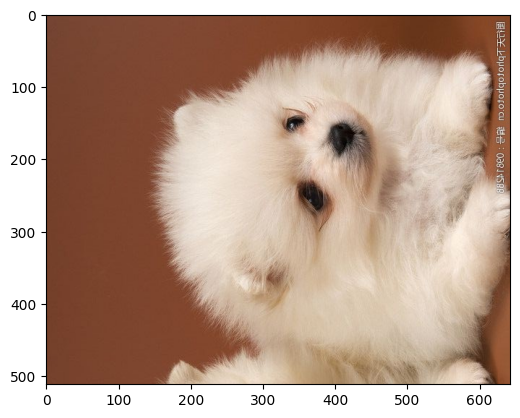

In [17]:
## 维度交换
img = rearrange(image,'h w c -> w h c')
plt.imshow(img)

In [18]:
## 增加/减少维度
img7 = rearrange(image, 'h w c ->1 h w c')
print(img7.shape)
img7 = rearrange(img7, '1 h w c ->h w c')
print(img7.shape)

(1, 643, 512, 3)
(643, 512, 3)


In [19]:
## 拆分单词（以w维度将单词拆分为6个字母）
# 以w维度对图像进行分组
# (b w)表示将第1维度的长度=b*w，b表示组数，w表示每组大小
print(image.shape)
img2=rearrange(image,'h (b w) c->b h w c',b=8)
print(img2.shape)

(643, 512, 3)
(8, 643, 64, 3)


(643, 512, 3)
(2572, 128, 3)


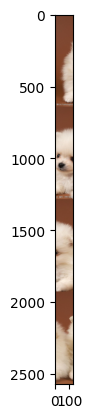

In [23]:
## 将单词改为竖向
# 先分组，而后将将b与h合并
print(image.shape)
img3 = rearrange(image, 'h (b w) c->(b h) w c', b=4)
print(img3.shape)
plt.imshow(img3)

(1286, 256, 3)


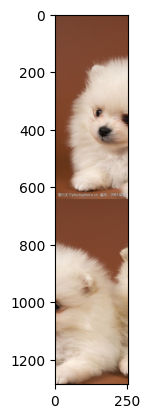

In [24]:
## 先分组，再排成两行
# 将第1维度分成b1 b2 和w的乘积。两行可以确定b1=2
img4 = rearrange(image, 'h (b1 b2 w) c->(b1 h) (b2 w) c', b1=2,b2=4)
print(img4.shape)
plt.imshow(img4)

## reduce操作
reduce能实现的效果就有些多


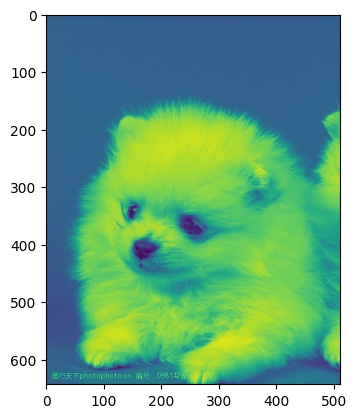

In [26]:
## 求均值
# 求均值，->前后消失的符号代表求均值的维度
# 如果想要保留纬度数不变，可以用1带填补
img5=reduce(image.astype("float"), 'h w c -> h w', 'mean') # 这里将图片转换为了float类型并归一化了，是因为reduce求平均值不能对整型的数据操作。
img5=reduce(image.astype("float"), 'h w c -> h w 1', 'mean')
plt.imshow(img5)
img5=reduce(image.astype("float"), 'h w c -> h', 'mean')


In [27]:
## 最小值
img6 = reduce(image.astype("float"), 'h w c -> h w 1', 'min')


其他计算：min, max, sum, prod

利用reduce还可以实现将图片切分，然后堆叠在一起求平均值、最大最小值等操作

In [30]:
# einops
# image
import numpy as np
ig = np.random.random((1, 3, 224, 224))

# einops
ig = reduce(ig, 'b c (h h2) (w w2) -> b c h w', reduction='mean', h2=4, w2=4)

print(ig.shape)

(1, 3, 56, 56)


## repeat操作
repeat主要用在将张量在某一个维度进行复制：

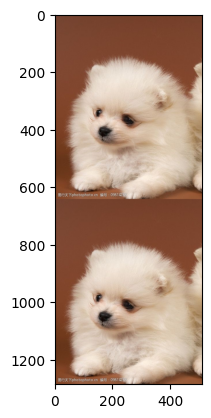

In [33]:
# 重复
img8=repeat(image, 'h w c -> (repeat h) w c', repeat=2)
plt.imshow(img8)



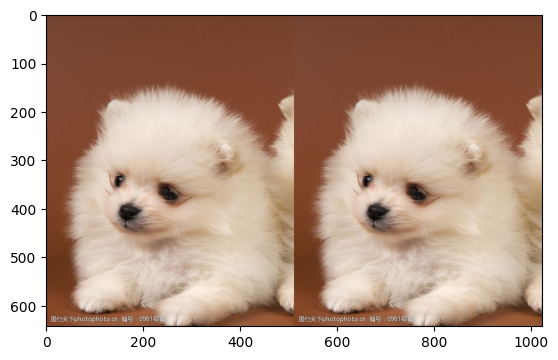

In [34]:
img8=repeat(image, 'h w c -> h (repeat w) c', repeat=2)
plt.imshow(img8)